<div class="alert alert-success">
    
**Step 1 - Set up the right environment**
    
</div>    

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
import matplotlib
import pandas
import sklearn

Python: 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.4.1


<div class="alert alert-block alert-info">

**Import Libraries**
    
</div>    

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#To enable zoom-able and resize-able figures instead of inline figures 

#%matplotlib notebook
%matplotlib inline

<div class="alert alert-success">
    
**Step 2 - Data Collection**
    
</div>      

In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

#Declare column or feature names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

#Dataset can be read in two ways - directly using the url
dataset = read_csv(url, names=names)

#or from a locally downloaded copy of iris.csv
#dataset = read_csv("./iris.csv", names=names)

<div class="alert alert-block alert-info">

**Note** - In this case, we do **not** need to do any **data cleaning/processing** because it already contains all relevant features and does not contain any NaN or missing values.
    
</div>    

<div class="alert alert-success">

**Step 3 - Data Exploration/Summary**
    
</div>    

In [5]:
# Dimensions or shape of the data set
dataset.shape

(150, 5)

In [6]:
# Peek at the, say first 20 rows, of the data set using head
dataset.head(20)

sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa

In [7]:
# Statistical summary of each attribute
# Pandas describe() is used to view basic statistical details, like count, mean, min and max values,
# & some percentiles
dataset.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<div class="alert alert-block alert-info">
    
**Notice** - All of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.
    
</div>    

In [8]:
# Number of instances (rows) that belong to each class => class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<div class="alert alert-success">

**Step 4 - Data Visualization**

For this case, data visualization can be carried out by plotting

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.   
    
</div>    

<div class="alert alert-success">    
    
**Univariate Plots**
    
</div>    

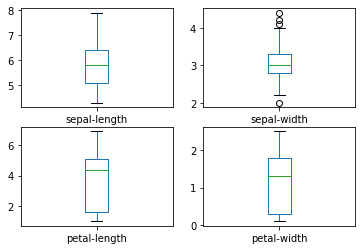

In [9]:
# box and whisker plots - because input variables are all *numeric*
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

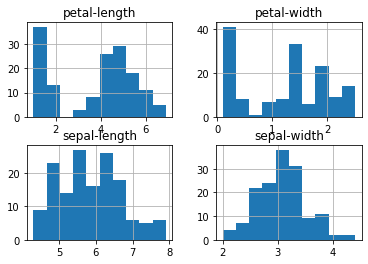

In [10]:
# histograms - to get an idea of the distribution of each input variable
dataset.hist()
pyplot.show()

<div class="alert alert-block alert-info"> 

It looks like perhaps **two** of the input variables have a **Gaussian distribution**. This is useful to note as we can use algorithms that can exploit this assumption.
    
</div>    

<div class="alert alert-success">  

**Multivariate Plots**
    
</div>    

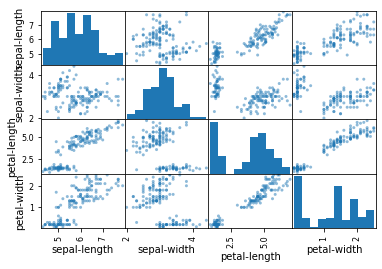

In [11]:
# scatter plot matrix - can be helpful to spot structured relationships between input variables
scatter_matrix(dataset)
pyplot.show()

<div class="alert alert-success">  

**Step 5 - Data Modeling/Analysis**

* **Create Training & Testing/Validation Set**
    
</div>    

In [12]:
# Split-out training & validation datasets
# First create input (X) and output (Y) data. 
# Then, split X & Y into two, 80% of which will be used to train, evaluate and select among various ML models, 
# and remaining 20% will be held back as a validation dataset.

array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

<div class="alert alert-block alert-info"> 

We now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later for testing.
    
#### Accuracy and k-fold Cross-Validation

In this example, **stratified 10-fold** (k is taken as 10 here) cross validation is being used to estimate model accuracy. This means that the training dataset will be split into 10 parts, trained on 9 and tested on 1 and then will be repeated for all combinations of train-test splits. 

**Stratified** means that each fold or split of the training dataset will aim to have the same distribution of example by class as exists in the whole training dataset. The random seed via the random_state argument is set to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

We are using the metric of **‘accuracy‘** to evaluate models, which is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset (represented as percentage). 
    
</div>    

<div class="alert alert-success">  

* **Build & Evaluate Models**

Since we don't know which models would be good on this problem or what configurations to use it is better to apply several models on the data set, compare their accuracy against one another, and then select a final model that is applied on the testing data set.  

For this example, we test 6 different algorithms:

* **Logistic Regression (LR)**.
* **Linear Discriminant Analysis (LDA)**.
* **K-Nearest Neighbors (KNN)**.
* **Classification and Regression Trees (CART)**.
* **Gaussian Naive Bayes (NB)**.
* **Support Vector Machines (SVM)**.

This is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART, NB and SVM) algorithms.
    
</div>    

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


<div class="alert alert-success">  

* **Select the best model**

Out of the 6 models, it seems that **Support Vector Machines (SVM)** has the largest estimated accuracy score at about 0.98 or 98%. A plot of the model evaluation results can give us a better idea on the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).
    
</div>    

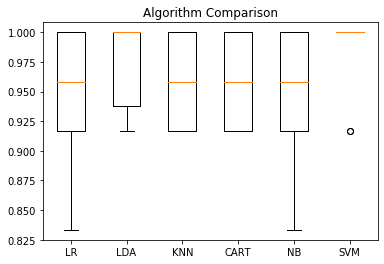

In [14]:
# Compare Algorithms using box and whisker plots for each distribution.
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

<div class="alert alert-success">  

**Step 6 - Make Predictions and Communicate**

In order to make predictions, we can choose the model with highest accuracy score, which was SVM for our case. Now we want to get an idea of the accuracy of the model on our validation/testing set. This will give us an independent final check on the accuracy of the best model. 

</div>

<div class="alert alert-block alert-info"> 
    
**Note** - A validation set is required in order to avoid pitfalls during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.
    
</div>    

In [15]:
# Fit the SVM model on the entire training dataset and make predictions on the validation dataset.
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

<div class="alert alert-success">
    
* **Evaluate Predictions**

This can be done by comparing predictions to expected results in the validation set, calculating classification accuracy, and printing out a confusion matrix and a classification report.
    
</div>    

In [16]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



<div class="alert alert-block alert-info"> 
    
We can see that the **accuracy** is 0.966 or about 97% on the hold out dataset.

The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).
    
</div>    